# Optimizing the design and operation of a DAC system under varying ambient conditions
This case study is based on a model developed here:
[Wiegner, Jan F., Alexa Grimm, Lukas Weimann, and Matteo Gazzani. "Optimal design and operation of solid sorbent direct air capture processes at varying ambient conditions." Industrial & Engineering Chemistry Research 61, no. 34 (2022): 12649-12667.
](https://pubs.acs.org/doi/10.1021/acs.iecr.2c00681)

We want to optimize the design and operation of a DAC with a target net negative emissions of 1000 t in the Netherlands. We therefore load climate data for a location in the Netherlands. We store the CO2 in a not further defined CO2 sink.

## Create templates
We set the input data path and in this directory we can add input data templates for the model configuration and the topology with the function create_optimization_templates.


In [1]:
import adopt_net0 as adopt
import json
from pathlib import Path

input_data_path = Path("./caseStudies/dac")
adopt.create_optimization_templates(input_data_path)

## Adapt Topology
We need to adapt the topology as well as the model configuration file to our case study. This can be done either in the file itself (Topology.json) or, as we do it here) via some lines of code.
For the topology, we need to change the following:
- Change nodes: nl
- Change carriers: electricity, heat and CO2captured
- Change investment periods: period1
- The options regarding the time frame we can leave at the default (one year with hourly operation)

In [2]:
# Load json template
with open(input_data_path / "Topology.json", "r") as json_file:
    topology = json.load(json_file)
# Nodes
topology["nodes"] = ["nl"]
# Carriers:
topology["carriers"] = ["electricity", "heat", "CO2captured"]
# Investment periods:
topology["investment_periods"] = ["period1"]
# Save json template
with open(input_data_path / "Topology.json", "w") as json_file:
    json.dump(topology, json_file, indent=4)

## Adapt Model Configurations
Now, we need to adapt the model configurations respectively. As the DAC model is rather complex, we also cluster the full resolution into 50 typical days (method 1).
- Change objective to 'costs_emissionlimit' (this minimizes annualized costs at an emission limit)
- Change emission limit to -1000 to account for the emission target
- Change the number of typical days to 30 and select time aggregation method 1 

In [3]:
# Load json template
with open(input_data_path / "ConfigModel.json", "r") as json_file:
    configuration = json.load(json_file)
# Change objective
configuration["optimization"]["objective"]["value"] = "costs_emissionlimit"
# Set emission limit:
configuration["optimization"]["emission_limit"]["value"] = -1000
# Set time aggregation settings:
configuration["optimization"]["typicaldays"]["N"]["value"] = 30
configuration["optimization"]["typicaldays"]["method"]["value"] = 1
# Set MILP gap
configuration["solveroptions"]["mipgap"]["value"] = 0.02
# Save json template
with open(input_data_path / "ConfigModel.json", "w") as json_file:
    json.dump(configuration, json_file, indent=4)

## Define input data
We first create all required input data files based on the topology file and then add the DAC technology as a new technology to the respective node.
Additionally we:
- copy over technology data to the input data folder
- define climate data for a dutch location (the location is used by default if nothing in NodeLocation.csv is specified)

In [4]:
adopt.create_input_data_folder_template(input_data_path)

# Add DAC as a new technology
with open(input_data_path / "period1" / "node_data" / "nl" / "Technologies.json", "r") as json_file:
    technologies = json.load(json_file)
technologies["new"] = ["DAC_Adsorption"]
technologies["existing"] = {"PermanentStorage_CO2_simple": 10000}

with open(input_data_path / "period1" / "node_data" / "nl" / "Technologies.json", "w") as json_file:
    json.dump(technologies, json_file, indent=4)

# Copy over technology files
adopt.copy_technology_data(input_data_path)

# Define climate data
adopt.load_climate_data_from_api(input_data_path)


Importing Climate Data...
Importing Climate Data successful


## Run model - infeasibility
Now, we have defined all required data to run the model. It will be infeasible though...

In [5]:
m = adopt.ModelHub()
m.read_data(input_data_path)
m.quick_solve()

INFO:--- Reading in data ---
INFO:Input data folder has been checked successfully - no errors occurred.


--- Reading in data ---


INFO:Topology read successfully
INFO:Model Configuration read successfully
INFO:Model Configuration used: {"optimization": {"objective": {"description": "String specifying the objective/type of optimization.", "options": ["costs", "emissions_pos", "emissions_net", "emissions_minC", "costs_emissionlimit", "pareto"], "value": "costs_emissionlimit"}, "emission_limit": {"description": "emission limit to be enforced if objective function is costs_emissionlimit", "value": -1000}, "monte_carlo": {"N": {"description": "Number of Monte Carlo simulations (0 = off).", "value": 0}, "type": {"description": "Type of Monte Carlo simulation. For type 1 the user defines the standard deviation and the components to vary. For type 2 the user provides a csv file with the parameters and their min, max and reference values. ", "options": ["normal_dis", "uniform_dis_from_file"], "value": "normal_dis"}, "sd": {"description": "Value defining the range in which variables are varied in Monte Carlo simulations (d

Input data folder has been checked successfully - no errors occurred.
Topology read successfully
Model Configuration read successfully
Found NaN values in data for investment period period1, node nl, key1 CarbonCost, carrier global, key2 price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarbonCost, carrier global, key2 subsidy. Replaced with zeros.


INFO:Found NaN values in data for investment period period1, node nl, key1 ClimateData, carrier global, key2 TECHNOLOGYNAME_hydro_inflow. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electr

Found NaN values in data for investment period period1, node nl, key1 ClimateData, carrier global, key2 TECHNOLOGYNAME_hydro_inflow. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import emission factor.

INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import emission factor. Replaced with zeros.


Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Generic production. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export price. Replaced with zeros.


INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export emission factor. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Generic production. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, k

Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import emission factor. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export emission factor. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Generic production. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import price. Replaced with 

INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Generic production. Replaced with zeros.
INFO:Time series read successfully
INFO:Node Locations read successfully
INFO:Energy balance options read successfully


Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export emission factor. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Generic production. Replaced with zeros.
Time series read successfully
Node Locations read successfully
Energy balance options read successfully
Deriving performance data for DAC...
Complete:  97.0 %99999999999 %%

INFO:Technology data read successfully
INFO:Network data read successfully


Complete:  99.0 %Complete:  100 %
Technology data read successfully
Network data read successfully


INFO:Clustered data successfully
INFO:--- Reading in data complete ---
INFO:--- Constructing Model ---
INFO:Constructing Investment Period period1
INFO:Constructing Investment Period period1 completed


Clustered data successfully
--- Reading in data complete ---
--- Constructing Model ---
Constructing Investment Period period1


INFO:	 - Adding Technology DAC_Adsorption


	 - Adding Technology DAC_Adsorption


position is deprecated.  Please use at()  (deprecated in 6.1, will be
removed in (or after) 7.0)
(called from C:\Users\6574114\PycharmProjects\adopt_net0\adopt_net0\components\technologies\technology.py:905)
INFO:			gdp.bigm Transformation...


			gdp.bigm Transformation...


INFO:			gdp.bigm Transformation completed in 1 s
INFO:	 - Adding Technology PermanentStorage_CO2_simple


	 - Adding Technology PermanentStorage_CO2_simple


INFO:Constructing model completed in 5s
INFO:Constructing balances...


Constructing model completed in 5s
Constructing balances...


INFO:Constructing balances completed in 1s


Constructing balances completed in 1s


INFO:Defined constraint on net emissions
INFO:Set objective on cost
INFO:Set parameter Username
INFO:Academic license - for non-commercial use only - expires 2025-04-29


Defined constraint on net emissions
Set objective on cost
____________________________________________________________
Solving Model...
Set parameter LogFile to value "userData\20240621165137-1\solver_log.txt"


INFO:Set parameter LogFile to value "userData\20240621165137-1\solver_log.txt"


Solver log file: userData\20240621165137-1\solver_log.txt
Set parameter TimeLimit to value 36000


INFO:Set parameter TimeLimit to value 36000


Set parameter MIPGap to value 0.02


INFO:Set parameter MIPGap to value 0.02


Set parameter NodefileStart to value 60


INFO:Set parameter NodefileStart to value 60


Set parameter LPWarmStart to value 0


INFO:Set parameter LPWarmStart to value 0


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))


INFO:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))


INFO:


CPU model: 13th Gen Intel(R) Core(TM) i7-1355U, instruction set [SSE2|AVX|AVX2]


INFO:CPU model: 13th Gen Intel(R) Core(TM) i7-1355U, instruction set [SSE2|AVX|AVX2]


Thread count: 10 physical cores, 12 logical processors, using up to 12 threads


INFO:Thread count: 10 physical cores, 12 logical processors, using up to 12 threads


INFO:


Optimize a model with 57149 rows, 47669 columns and 128694 nonzeros


INFO:Optimize a model with 57149 rows, 47669 columns and 128694 nonzeros


Model fingerprint: 0xd7401fdf


INFO:Model fingerprint: 0xd7401fdf


Variable types: 45508 continuous, 2161 integer (1440 binary)


INFO:Variable types: 45508 continuous, 2161 integer (1440 binary)


Coefficient statistics:


INFO:Coefficient statistics:


  Matrix range     [2e-06, 5e+06]


INFO:  Matrix range     [2e-06, 5e+06]


  Objective range  [1e+00, 1e+00]


INFO:  Objective range  [1e+00, 1e+00]


  Bounds range     [1e+00, 1e+09]


INFO:  Bounds range     [1e+00, 1e+09]


  RHS range        [2e-01, 1e+04]


INFO:  RHS range        [2e-01, 1e+04]


INFO:Warning: Model contains large matrix coefficient range


         Consider reformulating model or setting NumericFocus parameter


INFO:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:         to avoid numerical issues.


Presolve removed 35423 rows and 30984 columns


INFO:Presolve removed 35423 rows and 30984 columns


Presolve time: 0.03s


INFO:Presolve time: 0.03s


INFO:


Explored 0 nodes (0 simplex iterations) in 0.09 seconds (0.03 work units)


INFO:Explored 0 nodes (0 simplex iterations) in 0.09 seconds (0.03 work units)


Thread count was 1 (of 12 available processors)


INFO:Thread count was 1 (of 12 available processors)


INFO:


Solution count 0


INFO:Solution count 0


INFO:


Model is infeasible or unbounded


INFO:Model is infeasible or unbounded


Best objective -, best bound -, gap -


INFO:Best objective -, best bound -, gap -


Set parameter LogFile to value ""


INFO:Set parameter LogFile to value ""
  - termination condition: infeasibleOrUnbounded
  - message from solver: <undefined>


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: inf
  Upper bound: None
  Number of objectives: 1
  Number of constraints: 57149
  Number of variables: 47669
  Number of binary variables: 1440
  Number of integer variables: 2161
  Number of continuous variables: 44068
  Number of nonzeros: 128694
  Sense: minimize
  Number of solutions: 0
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Name: Gurobi 11.02
  Status: warning
  Wallclock time: 0.09800004959106445
  Termination condition: infeasibleOrUnbounded
  Termination message: Problem proven to be infeasible or u

## Allowing for heat and electricity import
The model is infeasible, because we did not define where heat or electricity should come from. Here, we allow for electricity and heat import at a certain price at no additional emissions. As such we define:
- An abitrary import limit on heat and electricity (1GW)
- An import price on electricity of 60 EUR/MWh
- An import price on heat of 20 EUR/MWh

In [6]:
adopt.fill_carrier_data(input_data_path, value_or_data=1000, columns=['Import limit'], carriers=['electricity', 'heat'], nodes=['nl'])
adopt.fill_carrier_data(input_data_path, value_or_data=60, columns=['Import price'], carriers=['electricity'], nodes=['nl'])
adopt.fill_carrier_data(input_data_path, value_or_data=20, columns=['Import price'], carriers=['heat'], nodes=['nl'])

## Run model again
Now, the model should be feasible

In [7]:
m = adopt.ModelHub()
m.read_data(input_data_path)
m.quick_solve()

INFO:--- Reading in data ---
INFO:Input data folder has been checked successfully - no errors occurred.
INFO:Topology read successfully
INFO:Model Configuration read successfully
INFO:Model Configuration used: {"optimization": {"objective": {"description": "String specifying the objective/type of optimization.", "options": ["costs", "emissions_pos", "emissions_net", "emissions_minC", "costs_emissionlimit", "pareto"], "value": "costs_emissionlimit"}, "emission_limit": {"description": "emission limit to be enforced if objective function is costs_emissionlimit", "value": -1000}, "monte_carlo": {"N": {"description": "Number of Monte Carlo simulations (0 = off).", "value": 0}, "type": {"description": "Type of Monte Carlo simulation. For type 1 the user defines the standard deviation and the components to vary. For type 2 the user provides a csv file with the parameters and their min, max and reference values. ", "options": ["normal_dis", "uniform_dis_from_file"], "value": "normal_dis"}, "sd

--- Reading in data ---
Input data folder has been checked successfully - no errors occurred.
Topology read successfully
Model Configuration read successfully
Found NaN values in data for investment period period1, node nl, key1 CarbonCost, carrier global, key2 price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarbonCost, carrier global, key2 subsidy. Replaced with zeros.


INFO:Found NaN values in data for investment period period1, node nl, key1 ClimateData, carrier global, key2 TECHNOLOGYNAME_hydro_inflow. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import emission factor. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export emission factor. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 Carrier

Found NaN values in data for investment period period1, node nl, key1 ClimateData, carrier global, key2 TECHNOLOGYNAME_hydro_inflow. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Import emission factor. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Export emission factor. Replaced with zeros.


INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import emission factor. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export emission factor. Replaced with zeros.


Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier electricity, key2 Generic production. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Import emission factor. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Export emission factor. Replaced with zeros.


INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Generic production. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Demand. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export limit. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export price. Replaced with zeros.
INFO:Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2

Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier heat, key2 Generic production. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Demand. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export limit. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Export price. Replaced with zeros.
Found NaN values in data for investment period period1, node nl, key1 CarrierData, carrier CO2captured, key2 Import emission factor. Replaced w

INFO:Time series read successfully
INFO:Node Locations read successfully
INFO:Energy balance options read successfully


Time series read successfully
Node Locations read successfully
Energy balance options read successfully
Deriving performance data for DAC...
Complete:  96.0 %99999999999 %%

INFO:Technology data read successfully
INFO:Network data read successfully


Complete:  99.0 %Complete:  100 %
Technology data read successfully
Network data read successfully


INFO:Clustered data successfully
INFO:--- Reading in data complete ---
INFO:--- Constructing Model ---
INFO:Constructing Investment Period period1
INFO:Constructing Investment Period period1 completed


Clustered data successfully
--- Reading in data complete ---
--- Constructing Model ---
Constructing Investment Period period1


INFO:	 - Adding Technology DAC_Adsorption


	 - Adding Technology DAC_Adsorption


INFO:			gdp.bigm Transformation...


			gdp.bigm Transformation...


INFO:			gdp.bigm Transformation completed in 1 s
INFO:	 - Adding Technology PermanentStorage_CO2_simple


	 - Adding Technology PermanentStorage_CO2_simple


INFO:Constructing model completed in 5s
INFO:Constructing balances...


Constructing model completed in 5s
Constructing balances...


INFO:Constructing balances completed in 1s
INFO:Defined constraint on net emissions
INFO:Set objective on cost


Constructing balances completed in 1s
Defined constraint on net emissions
Set objective on cost
____________________________________________________________
Solving Model...
Set parameter LogFile to value "userData\20240621165209-1\solver_log.txt"


INFO:Set parameter LogFile to value "userData\20240621165209-1\solver_log.txt"


Solver log file: userData\20240621165209-1\solver_log.txt
Set parameter TimeLimit to value 36000


INFO:Set parameter TimeLimit to value 36000


Set parameter MIPGap to value 0.02


INFO:Set parameter MIPGap to value 0.02


Set parameter NodefileStart to value 60


INFO:Set parameter NodefileStart to value 60


Set parameter LPWarmStart to value 0


INFO:Set parameter LPWarmStart to value 0


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))


INFO:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))


INFO:


CPU model: 13th Gen Intel(R) Core(TM) i7-1355U, instruction set [SSE2|AVX|AVX2]


INFO:CPU model: 13th Gen Intel(R) Core(TM) i7-1355U, instruction set [SSE2|AVX|AVX2]


Thread count: 10 physical cores, 12 logical processors, using up to 12 threads


INFO:Thread count: 10 physical cores, 12 logical processors, using up to 12 threads


INFO:


Optimize a model with 57149 rows, 47669 columns and 130134 nonzeros


INFO:Optimize a model with 57149 rows, 47669 columns and 130134 nonzeros


Model fingerprint: 0x1c554980


INFO:Model fingerprint: 0x1c554980


Variable types: 45508 continuous, 2161 integer (1440 binary)


INFO:Variable types: 45508 continuous, 2161 integer (1440 binary)


Coefficient statistics:


INFO:Coefficient statistics:


  Matrix range     [2e-06, 5e+06]


INFO:  Matrix range     [2e-06, 5e+06]


  Objective range  [1e+00, 1e+00]


INFO:  Objective range  [1e+00, 1e+00]


  Bounds range     [1e+00, 1e+09]


INFO:  Bounds range     [1e+00, 1e+09]


  RHS range        [2e-01, 1e+04]


INFO:  RHS range        [2e-01, 1e+04]


INFO:Warning: Model contains large matrix coefficient range


         Consider reformulating model or setting NumericFocus parameter


INFO:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:         to avoid numerical issues.


Presolve removed 54571 rows and 45898 columns


INFO:Presolve removed 54571 rows and 45898 columns


Presolve time: 0.34s


INFO:Presolve time: 0.34s


Presolved: 2578 rows, 1771 columns, 7796 nonzeros


INFO:Presolved: 2578 rows, 1771 columns, 7796 nonzeros


Variable types: 1050 continuous, 721 integer (0 binary)


INFO:Variable types: 1050 continuous, 721 integer (0 binary)


INFO:


Root relaxation: objective 5.163152e+07, 1210 iterations, 0.10 seconds (0.13 work units)


INFO:Root relaxation: objective 5.163152e+07, 1210 iterations, 0.10 seconds (0.13 work units)


INFO:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:


     0     0 5.1632e+07    0  721          - 5.1632e+07      -     -    0s


INFO:     0     0 5.1632e+07    0  721          - 5.1632e+07      -     -    0s


H    0     0                    2.907490e+08 5.1632e+07  82.2%     -    0s


INFO:H    0     0                    2.907490e+08 5.1632e+07  82.2%     -    0s


H    0     0                    1.887496e+08 5.1632e+07  72.6%     -    0s


INFO:H    0     0                    1.887496e+08 5.1632e+07  72.6%     -    0s


*    0     0               0    5.614805e+07 5.6148e+07  0.00%     -    0s


INFO:*    0     0               0    5.614805e+07 5.6148e+07  0.00%     -    0s


INFO:


Explored 1 nodes (1867 simplex iterations) in 0.93 seconds (0.62 work units)


INFO:Explored 1 nodes (1867 simplex iterations) in 0.93 seconds (0.62 work units)


Thread count was 12 (of 12 available processors)


INFO:Thread count was 12 (of 12 available processors)


INFO:


Solution count 3: 5.6148e+07 1.8875e+08 2.90749e+08 


INFO:Solution count 3: 5.6148e+07 1.8875e+08 2.90749e+08 


INFO:


Optimal solution found (tolerance 2.00e-02)


INFO:Optimal solution found (tolerance 2.00e-02)


Best objective 5.614804696532e+07, best bound 5.614804696532e+07, gap 0.0000%


INFO:Best objective 5.614804696532e+07, best bound 5.614804696532e+07, gap 0.0000%


Set parameter LogFile to value ""


INFO:Set parameter LogFile to value ""
INFO:Writing results to userData\20240621165209-1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 56148046.965321876
  Upper bound: 56148046.965321876
  Number of objectives: 1
  Number of constraints: 57149
  Number of variables: 47669
  Number of binary variables: 1440
  Number of integer variables: 2161
  Number of continuous variables: 44068
  Number of nonzeros: 130134
  Sense: minimize
  Number of solutions: 3
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Name: Gurobi 11.02
  Status: ok
  Wallclock time: 0.9659998416900635
  Termination condition: optimal
  Termination message: Model was solved to optimal

## Visualization
The results can be inspected using the provided [visualization platform](https://resultvisualization.streamlit.app/) for some basic plots. The figures below are screenshots from the visualization platform.

### Costs
The objective is 295506, which are the total annual costs (from the log or the Summary.xlsx). As we captured 1000 t of CO2, the specific capturing costs are around 300 EUR.

### Electricity and Heat requirements
<div>
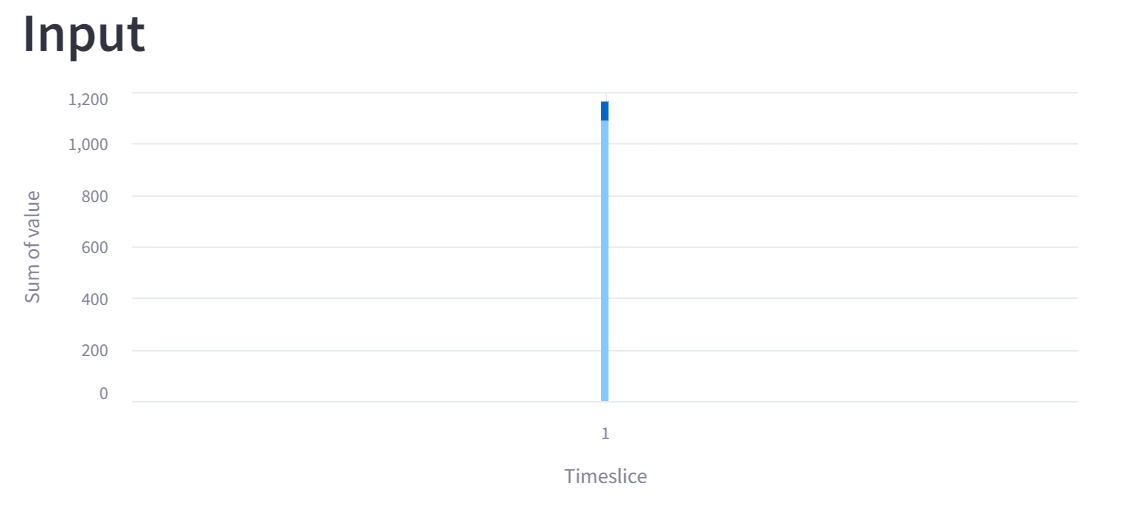
</div>

### DAC operation
<div>
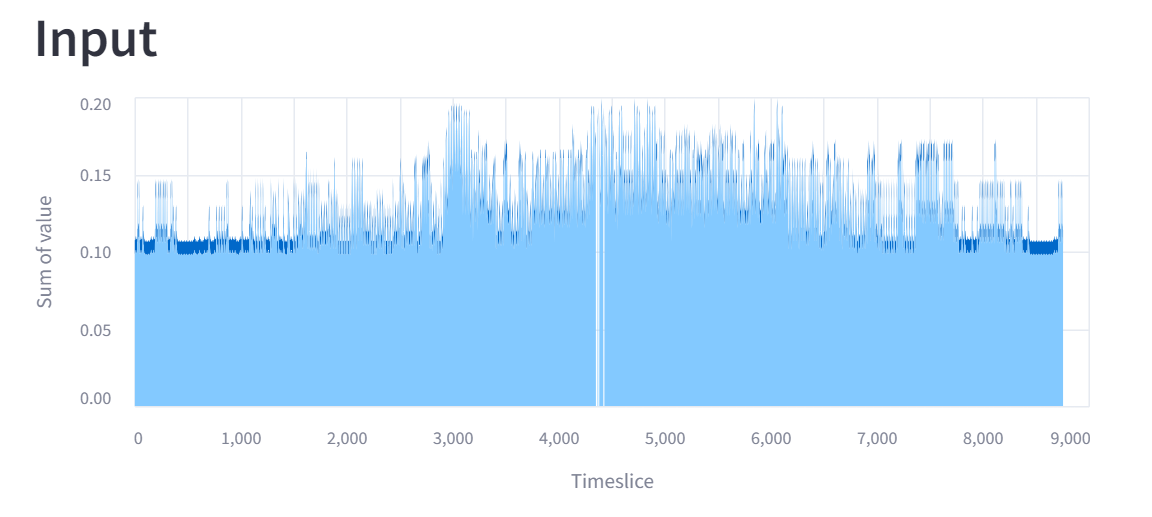
</div>